In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8,4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
data_final_N = pd.read_csv('data_molN.csv', sep=',')
data_final_ST = pd.read_csv('data_molST.csv', sep=',')
data_final_N.head()

,molecules,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,H2,N,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
1,He,N,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
2,H2O,N,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
3,CH4,N,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
4,H2,N,0.154927,0.154558,0.154194,0.153836,0.153484,0.153139,0.152800,0.152467,...,0.212166,0.212132,0.212102,0.212075,0.212050,0.212029,0.212011,0.211996,0.211984,0.211976


In [4]:
data_final_ST.head()

,molecules,exoplanet_type,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,N2,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
1,CH3Cl,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
2,H2O,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
3,H2S,ST,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,0.300117,...,0.302737,0.302734,0.302731,0.302729,0.302727,0.302725,0.302724,0.302722,0.302721,0.302720
4,N2,ST,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,0.300104,...,0.302836,0.302833,0.302830,0.302827,0.302825,0.302823,0.302821,0.302820,0.302819,0.302818


In [5]:
data_final = pd.concat([data_final_N, data_final_ST])

<AxesSubplot:xlabel='exoplanet_type', ylabel='count'>

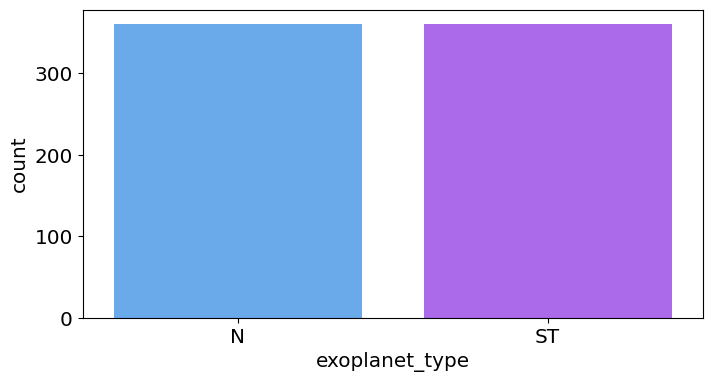

In [6]:
# Balance dataset
sns.countplot(x='exoplanet_type', data=data_final, palette='cool')

In [8]:
# Data 
X_data = data_final[data_final.columns[2:]]
y_data = data_final.exoplanet_type # label

X_data.head()

,0.3000004285720408,0.3045686178256013,0.3091368070791618,0.3137049963327223,0.3182731855862828,0.3228413748398433,0.3274095640934038,0.33197775334696433,0.33654594260052484,0.34111413185408535,...,13.958886296717955,13.963454485971514,13.968022675225075,13.972590864478637,13.977159053732196,13.981727242985757,13.986295432239316,13.990863621492878,13.995431810746439,13.999999999999998
0,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,0.157520,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
1,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,0.157520,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
2,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,0.157520,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
3,0.162458,0.161869,0.161287,0.160716,0.160158,0.159610,0.159072,0.158545,0.158027,0.157520,...,0.268190,0.268130,0.268073,0.268023,0.267977,0.267937,0.267903,0.267874,0.267852,0.267837
4,0.154927,0.154558,0.154194,0.153836,0.153484,0.153139,0.152800,0.152467,0.152140,0.151819,...,0.212166,0.212132,0.212102,0.212075,0.212050,0.212029,0.212011,0.211996,0.211984,0.211976


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((504, 3000), (216, 3000), (504,), (216,))

# Entrenamiento y GridSearch: Búsqueda de mejores hiperparámetros

In [40]:
def graph_neighbors(X_train, y_train, X_test, y_test):
    
    training_accuracy = []
    test_accuracy = []

    # try n_neighbors from 1 to 10
    neighbors_settings = range(1, 10)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        # record training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.grid()
    plt.legend()

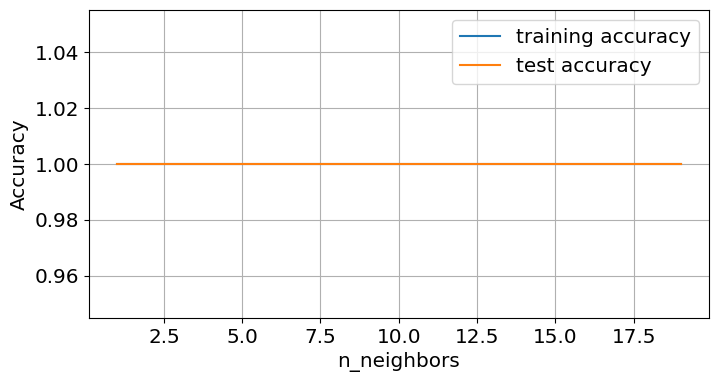

In [11]:
graph_neighbors(X_train, y_train, X_test, y_test)

In [12]:
def model(X_train, y_train):
    
    knn = KNeighborsClassifier()  
    
    param_grid = dict(n_neighbors=[4,5], 
                      weights=['uniform', 'distance'],
                      algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

    grid = GridSearchCV(knn, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    best_param = grid.best_params_
    
    print('Mejores hiperparámetros',grid.best_params_)
    print('Mejor score',grid.best_score_)
    
    return best_param

In [13]:
best_param = model(X_train, y_train)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
Mejor score 1.0


# Modelo final

In [68]:
def train_test_model(X_train, y_train, X_test, y_test, y_data, best_param, class1, class2):
    
    clf = KNeighborsClassifier(**best_param)
    clf.fit(X_train, y_train)

    p = clf.predict(X_test)
    
    #Importe el módulo de métricas de sklearn para medir el desempeño (accuracy_score) de su modelo.
    print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, p))
    
    # Matrix de confusión
    mat = confusion_matrix(y_test, p)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
               xticklabels=[class1, class2],
               yticklabels=[class1, class2])
    plt.title('Matriz de confusión')
    plt.xlabel('Categoría real')
    plt.ylabel('Categoría Predicha')
    print(classification_report(y_test, p))
    
    
    #train model with cv of 5 
    cv_scores = cross_val_score(clf, X_test , y_test, cv=5)
    #print each cv score (accuracy) and average them
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    
    # Show first two principal components without scaler
    pca = PCA()
    plt.figure(figsize=(8,6))
    Xt = pca.fit_transform(X_test)
    plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_test.astype("category").cat.codes)
    plt.legend(handles=plot.legend_elements()[0], labels=[class1, class2])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Primeros dos componenetes principales")
    plt.grid()
    plt.show()
    
    return p

Train set Accuracy:  1.0
Test set Accuracy:  1.0
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       106
          ST       1.00      1.00      1.00       110

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

[1. 1. 1. 1. 1.]
cv_scores mean:1.0


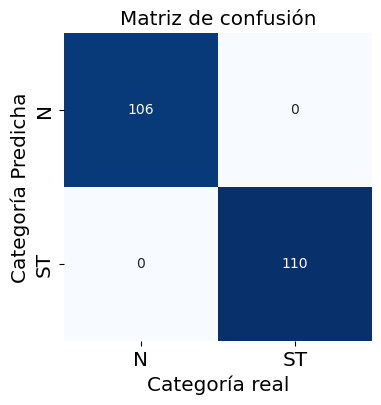

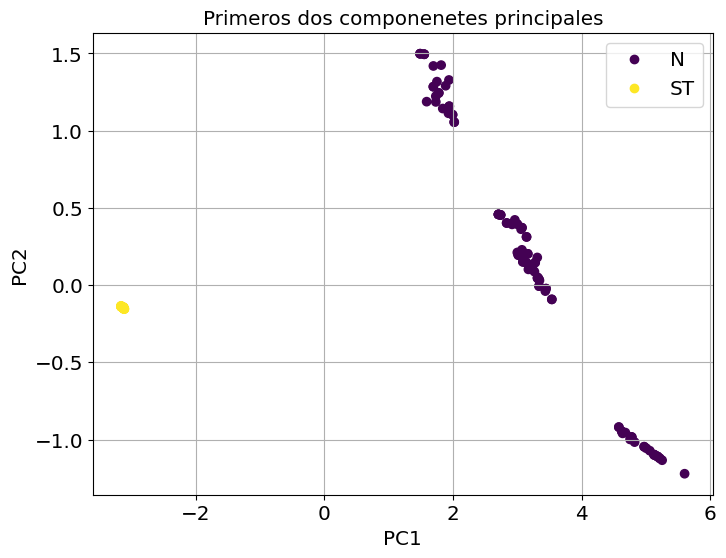

In [69]:
pred_vis = train_test_model(X_train, 
                            y_train, 
                            X_test, 
                            y_test, 
                            y_data, 
                            best_param,
                           'N', 
                           'ST')

## Presencia de agua H2O

### Presencia de agua
Solo tomar espectros con presencia de agua, tanto en las super-tierras como en los mini-Neptunos

In [70]:
H2O_present = data_final[data_final.molecules == 'H2O']
H2O_present['H2O'] = 'present'
H2O_present.shape

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_2998/2555859761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2O_present['H2O'] = 'present'


(109, 3003)

### Sin presencia de agua

In [71]:
H2O_no_present = data_final[data_final.molecules != 'H2O'][:109]
H2O_no_present['H2O'] = 'no_present'
H2O_no_present.shape

(109, 3003)

In [72]:
# Caracterìsticas y labels 
X_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[2:-2]], H2O_present[H2O_present.columns[2:-2]]])
y_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[-1]], H2O_present[H2O_present.columns[-1]]])

In [73]:
# Test y train
X_train_H2O, X_test_H2O, y_train_H2O, y_test_H2O = train_test_split(X_data_H2O, y_data_H2O, test_size=0.3, random_state=1)
X_train_H2O.shape, X_test_H2O.shape, y_train_H2O.shape, y_test_H2O.shape

((152, 2999), (66, 2999), (152,), (66,))

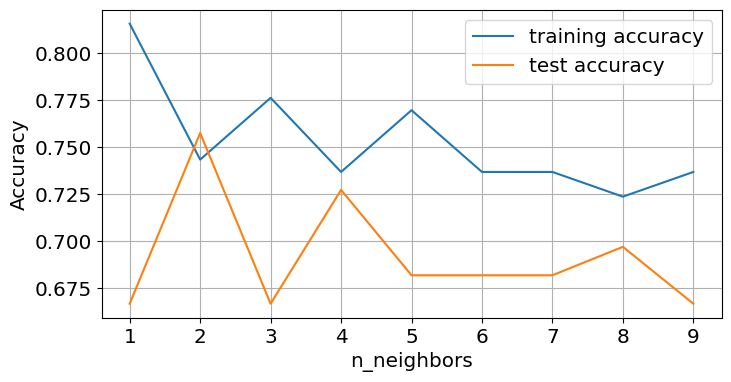

In [74]:
graph_neighbors(X_train_n2o, y_train_n2o, X_test_n2o, y_test_n2o)

In [62]:
best_param = model(X_train_H2O, y_train_H2O)

Mejores hiperparámetros {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Mejor score 0.6972043010752689


Train set Accuracy:  0.8223684210526315
Test set Accuracy:  0.7424242424242424
              precision    recall  f1-score   support

  no_present       0.68      0.97      0.80        35
     present       0.94      0.48      0.64        31

    accuracy                           0.74        66
   macro avg       0.81      0.73      0.72        66
weighted avg       0.80      0.74      0.72        66

[0.85714286 0.61538462 0.69230769 0.61538462 0.61538462]
cv_scores mean:0.6791208791208792


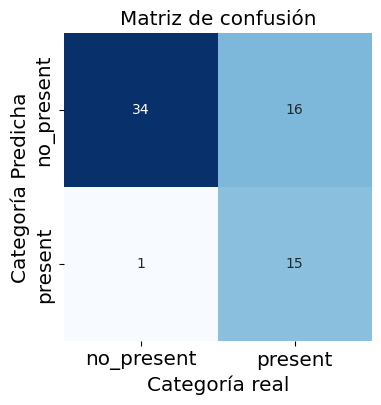

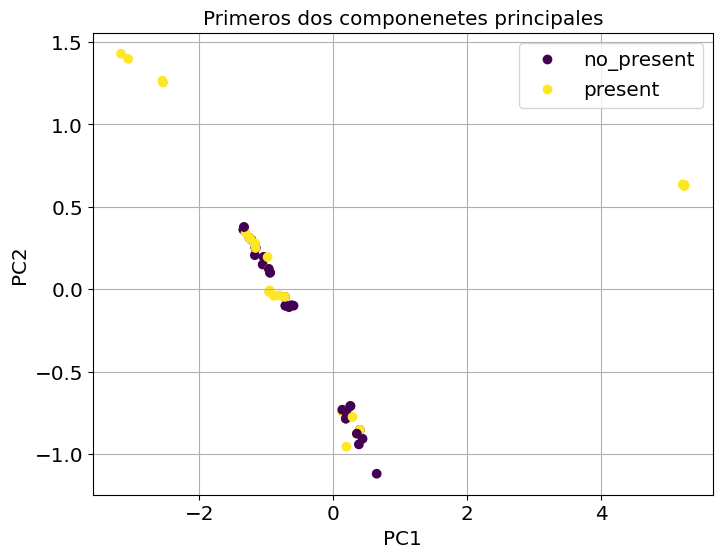

In [75]:
pred_vis = train_test_model(X_train_H2O,
                            y_train_H2O,
                            X_test_H2O,
                            y_test_H2O,
                            y_data_H2O,
                            best_param,
                           'no_present',
                           'present')

In [77]:
H2O_present = data_final[data_final.molecules == 'CH4']
H2O_present['CH4'] = 'present'
H2O_present.shape

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_2998/3608875296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H2O_present['CH4'] = 'present'


(93, 3003)

In [78]:
H2O_no_present = data_final[data_final.molecules != 'CH4'][:93]
H2O_no_present['CH4'] = 'no_present'
H2O_no_present.shape

(93, 3003)

In [79]:
# Caracterìsticas y labels 
X_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[2:-2]], H2O_present[H2O_present.columns[2:-2]]])
y_data_H2O = pd.concat([H2O_no_present[H2O_no_present.columns[-1]], H2O_present[H2O_present.columns[-1]]])

In [80]:
# Test y train
X_train_H2O, X_test_H2O, y_train_H2O, y_test_H2O = train_test_split(X_data_H2O, y_data_H2O, test_size=0.3, random_state=1)
X_train_H2O.shape, X_test_H2O.shape, y_train_H2O.shape, y_test_H2O.shape

((130, 2999), (56, 2999), (130,), (56,))

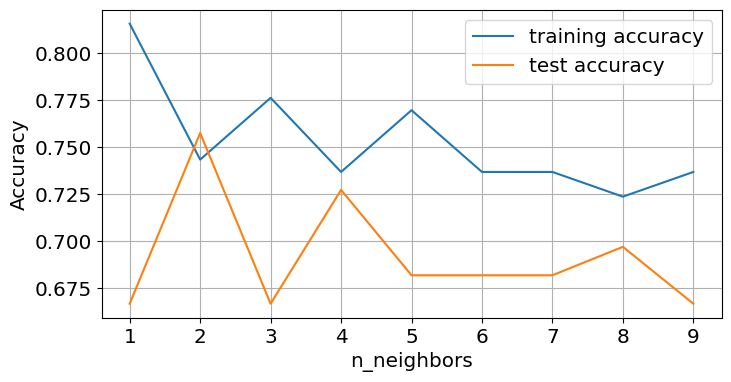

In [81]:
graph_neighbors(X_train_n2o, y_train_n2o, X_test_n2o, y_test_n2o)

In [82]:
best_param = model(X_train_H2O, y_train_H2O)

Mejores hiperparámetros {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Mejor score 0.6923076923076923


Train set Accuracy:  0.8615384615384616
Test set Accuracy:  0.6607142857142857
              precision    recall  f1-score   support

  no_present       0.60      0.93      0.72        27
     present       0.86      0.41      0.56        29

    accuracy                           0.66        56
   macro avg       0.73      0.67      0.64        56
weighted avg       0.73      0.66      0.64        56

[0.5        0.54545455 0.36363636 0.54545455 0.72727273]
cv_scores mean:0.5363636363636364


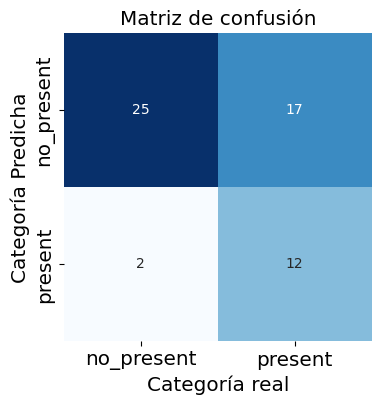

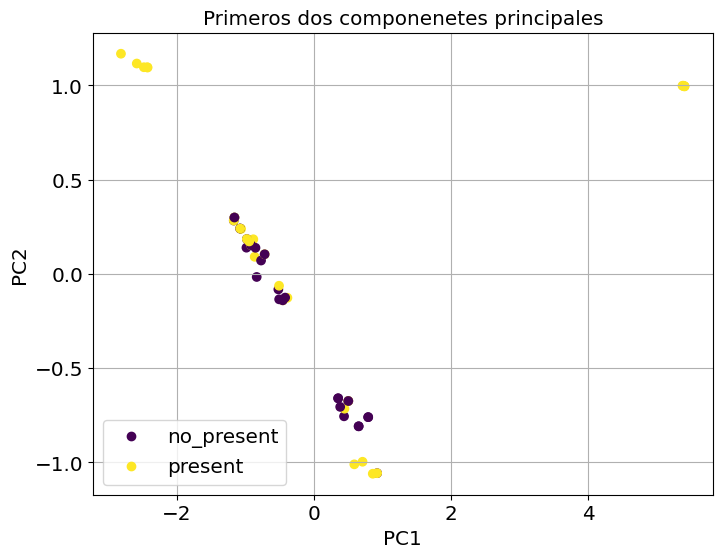

In [83]:
pred_vis = train_test_model(X_train_H2O,
                            y_train_H2O,
                            X_test_H2O,
                            y_test_H2O,
                            y_data_H2O,
                            best_param,
                           'no_present',
                           'present')